## Módulo 16 - Análise de Componentes Principais (PCA)

In [57]:
# EDA and data visualization
import pandas as pd
import seaborn as sns
import plotly.express as px

# statistics and maths
import numpy as np

# ML
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

# save model
import joblib

### Bloco 1 - EAD

#### Carga dos Dados

Neste vídeo, iniciamos a prática do módulo de PCA, abordando a redução de dimensionalidade. Foram importadas bibliotecas como Pandas, Matplotlib e Scikit-Learn. Carregamos um conjunto de dados de países com informações como mortalidade infantil, exportação, renda e expectativa de vida. Expliquei a estrutura do dataset e mostramos os primeiros e últimos registros. Nos próximos vídeos, faremos a Análise Exploratória de Dados (EDA) e trabalharemos com o PCA.

In [58]:
# Load dataframe
df_countries = pd.read_csv(filepath_or_buffer='../datasets/raw/dataset_countries.csv', sep=';', decimal=',')
df_countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Low income
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Upper middle income
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Lower middle income
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Lower middle income
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,High income


In [59]:
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          165 non-null    object 
 1   child_mort       165 non-null    float64
 2   exports          165 non-null    float64
 3   health           165 non-null    float64
 4   imports          165 non-null    float64
 5   income           165 non-null    int64  
 6   inflation        165 non-null    float64
 7   life_expec       165 non-null    float64
 8   total_fer        165 non-null    float64
 9   gdpp             165 non-null    int64  
 10  income_category  165 non-null    object 
dtypes: float64(7), int64(2), object(2)
memory usage: 14.3+ KB


**features description:**

- country - Nome do País
- child_mort - Mortalidade infantil a cada 1000 nascimentos
- exports; - Nível de Exportação (percentual com base no PIB)
- health - Investimento em Saúde (percentual com base no PIB)
- imports - Nível de Importação (percentual com base no PIB)
- income - Renda média por habitante
- inflation - Inflação
- life_expec - Expectativa de vida em anos
- total_fer - Total de crianças que poderiam ter nascido pra cada mulher, se o nível de fertilidade se mantem o mesmo
- gdpp - PIB per capita (PIB do país dividido pela população)
- income_category - Categoria do país com base na renda

#### Análise Univariada

Neste resumo, expliquei como foi realizada a Análise Exploratória de Dados (EDA) em um conjunto de dados de países. Foram analisadas estatísticas das variáveis, distribuição da categoria de renda, distribuição da renda média, do PIB per capita, da inflação e da expectativa de vida. Observou-se que a maioria dos países são considerados de alta renda, com concentração de valores em determinadas faixas para as variáveis analisadas. A análise univariada foi concluída, preparando para a análise bivariada no próximo vídeo.

In [60]:
# Descriptive statistics
df_countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,38.567273,41.193327,6.825576,46.999793,17183.412121,7.585612,70.505455,2.959818,13011.963636
std,40.480851,27.560749,2.759425,24.233083,19389.968166,10.198185,8.935045,1.518166,18428.279743
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,7.900000,23.800000,4.930000,30.400000,3340.000000,1.770000,65.300000,1.800000,1310.000000
50%,19.700000,35.000000,6.320000,43.300000,9940.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.200000,51.400000,8.650000,58.900000,22900.000000,10.600000,76.800000,3.910000,14600.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [61]:
# Percentage of income category
percentual_income_category = df_countries.value_counts(subset='income_category') / len(df_countries) * 100

# Bar chart of income category
px.bar(data_frame=percentual_income_category, color=percentual_income_category, color_continuous_scale='RdBu')

In [62]:
# Histogram of income
px.histogram(data_frame=df_countries['income'],
             title='Histograma da variável Income')

In [63]:
# Histogram of gdpp
px.histogram(data_frame=df_countries['gdpp'],
             title='Histograma da variável GDPP')

In [64]:
# Histogram of inflation
px.histogram(data_frame=df_countries['inflation'],
             title='Histograma da variável Inflation')

In [65]:
# Histogram of life expectation
px.histogram(data_frame=df_countries['life_expec'],
             title='Histograma da variável Life Expectation')

#### Análise Bivariada

Neste vídeo, continuamos o EDA com análises bivariadas, utilizando gráficos de Box Plot e Scatter Plot para explorar a correlação entre variáveis como Income, GDPP e Inflation, de acordo com as categorias de renda dos países. Observamos outliers e padrões interessantes, como a relação entre Income e GDPP. Também geramos uma matriz de correlação para identificar relações fortes entre variáveis numéricas, preparando o terreno para a próxima etapa de redução de dimensionalidade com o PCA.

In [66]:
# Boxplot of income x income category
px.box(data_frame=df_countries, x='income', y='income_category', color='income_category', orientation='h', hover_data=[
       'country'], title='Boxplot Income x Income Category', color_discrete_sequence=px.colors.qualitative.Safe, template='ggplot2')

In [67]:
# Boxplot of gdpp x income category
px.box(data_frame=df_countries, x='gdpp', y='income_category', color='income_category', orientation='h', hover_data=[
       'country'], title='Boxplot GDPP x Income Category', color_discrete_sequence=px.colors.qualitative.Safe, template='ggplot2')

In [68]:
# Boxplot of inflation x income category
px.box(data_frame=df_countries, x='inflation', y='income_category', color='income_category', orientation='h', hover_data=[
       'country'], title='Boxplot Inflation x Income Category', color_discrete_sequence=px.colors.qualitative.Alphabet, template='ggplot2')

In [69]:
# Boxplot of life expec x income category
px.box(data_frame=df_countries, x='life_expec', y='income_category', color='income_category', orientation='h', hover_data=[
       'country'], title='Boxplot Life Expectation x Income Category', color_discrete_sequence=px.colors.qualitative.Bold, template='ggplot2')

In [70]:
# Scatterplot of income x gdpp
px.scatter(data_frame=df_countries, x='income', y='gdpp', color='income_category', hover_data=[
           'country'], title='Scatterplot Income x GDPP', color_discrete_sequence=px.colors.qualitative.Safe, template='ggplot2')

<Axes: >

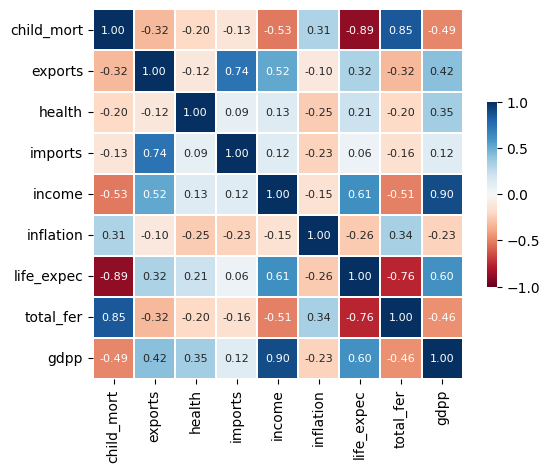

In [71]:
# Correlation matrix
matrix_corr_countries = df_countries.corr(numeric_only=True)

# Heatmap of correlation
sns.heatmap(data=matrix_corr_countries, vmin=-1, vmax=1, annot=True, cmap='RdBu',
            square=True, linewidths=0.1, cbar_kws={"shrink": 0.5}, annot_kws={"size": 8}, fmt='.2f', center=0)

### Bloco 3 - Treinamento do Algoritmo

Neste trecho, explicamos a importância de normalizar variáveis antes de aplicar o PCA. Demonstramos como selecionar e preparar as variáveis para o algoritmo, aplicar transformações nos dados numéricos e executar o PCA com 3 componentes. Mostramos como incorporar os componentes principais de volta ao DataFrame original e visualizamos os resultados. Por fim, mencionamos a próxima etapa de calcular métricas para avaliar a eficácia da redução de dimensionalidade.

In [72]:
# copy dataframe
df_countries_transformed = df_countries.copy()

# drop unnecessary columns
df_countries_transformed.drop(
    columns=['country', 'income_category'], axis=1, inplace=True)

# create list of numeric features
numeric_features = df_countries_transformed.select_dtypes(
    include=['int64', 'float64']).columns

# standardize numeric features
numeric_transformer = StandardScaler()

# create preprocessor
preprocessor = ColumnTransformer(
    transformers=[('num', numeric_transformer, numeric_features)])

# fit preprocessor
df_countries_encoded = preprocessor.fit_transform(X=df_countries_transformed)

# create dataframe from encoded data
df_countries_encoded_display = pd.DataFrame(
    pd.DataFrame(df_countries_encoded, columns=numeric_features))

# display
df_countries_encoded_display

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.279368,-1.135248,0.274231,-0.086914,-0.805613,0.182389,-1.605924,1.889707,-0.678137
1,-0.544310,-0.480157,-0.100171,0.066235,-0.375219,-0.304469,0.650493,-0.865390,-0.485619
2,-0.279183,-0.101660,-0.965295,-0.645699,-0.221581,0.837434,0.672945,-0.046128,-0.465480
3,1.992981,0.768155,-1.445112,-0.169697,-0.583692,1.457072,-1.168112,2.114343,-0.516100
4,-0.700413,0.156737,-0.289190,0.492568,0.099145,-0.604453,0.706623,-0.548256,-0.044195
...,...,...,...,...,...,...,...,...,...
160,-0.056179,-0.345500,-0.369159,-0.765735,-0.669563,0.876776,-0.191454,-0.409510,-0.633123
161,-0.232105,0.196770,-0.572718,0.235940,-0.736295,-0.488394,-0.842559,0.356895,-0.546580
162,-0.378296,1.121176,0.005243,1.374207,-0.656631,0.444013,0.291263,-0.667181,-0.636933
163,0.439386,-0.407369,-0.598163,-0.521525,-0.657148,1.575098,-0.337391,1.129908,-0.636933


In [73]:
# display covariance
df_countries_encoded_display_cov = pd.DataFrame(
    pd.DataFrame(np.cov(df_countries_encoded)))

# display
df_countries_encoded_display_cov

,0,1,2,3,4,5,6,7,8,9,...,155,156,157,158,159,160,161,162,163,164
0,1.281018,-0.309291,-0.132991,1.055036,-0.447859,-0.134766,-0.202244,-0.714776,-0.870255,-0.158039,...,-0.267971,-0.923682,-0.625688,-0.474692,-0.293142,0.094064,0.250492,-0.311630,0.603806,1.119862
1,-0.309291,0.190231,0.057183,-0.402486,0.158975,0.092268,0.134715,0.146901,0.192758,-0.024644,...,0.123051,0.064650,0.163735,0.171113,0.134192,0.001217,-0.096754,0.148551,-0.142873,-0.404532
2,-0.132991,0.057183,0.336890,0.238354,0.004402,0.261329,0.154519,-0.046112,-0.211639,0.174398,...,0.053309,0.141114,-0.087810,-0.414144,0.040733,0.202873,-0.060551,0.032610,0.289119,-0.024130
3,1.055036,-0.402486,0.238354,1.822171,-0.455312,-0.203773,-0.098385,-1.142357,-1.344139,0.172611,...,-0.247744,-0.425278,-1.077603,-1.807536,-0.537765,0.292091,0.366356,-0.096191,0.913746,1.315301
4,-0.447859,0.158975,0.004402,-0.455312,0.244875,-0.085335,0.099020,0.192302,0.290786,-0.074771,...,0.068234,0.305581,0.191033,0.049301,0.074909,-0.121587,-0.035386,0.181902,-0.287952,-0.488001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,0.094064,0.001217,0.202873,0.292091,-0.121587,0.267169,0.073313,-0.178865,-0.257191,0.183447,...,0.111352,-0.123867,-0.161546,-0.212575,0.013622,0.242158,-0.043377,0.035599,0.319794,0.180534
161,0.250492,-0.096754,-0.060551,0.366356,-0.035386,-0.259299,-0.065908,-0.414803,-0.310785,-0.074589,...,-0.042458,-0.109389,-0.331553,-0.553219,-0.200838,-0.043377,0.203121,0.127859,0.097939,0.285078
162,-0.311630,0.148551,0.032610,-0.096191,0.181902,-0.163734,0.123775,-0.474109,-0.117290,0.020708,...,0.307123,0.135163,-0.285906,-0.615367,-0.110568,0.035599,0.127859,0.595400,-0.082116,-0.238820
163,0.603806,-0.142873,0.289119,0.913746,-0.287952,0.240452,0.038534,-0.533751,-0.756785,0.138990,...,-0.028588,-0.368377,-0.506749,-0.753601,-0.150614,0.319794,0.097939,-0.082116,0.712220,0.685677


In [74]:
# create models PCA 
model_pca_3 = PCA(n_components=3)
model_pca_2 = PCA(n_components=2)

# fit models PCA
X_pca_3 = model_pca_3.fit_transform(X=df_countries_encoded)
X_pca_2 = model_pca_2.fit_transform(X=df_countries_encoded)

# create dataframes from PCA
df_countries_pca_3 = pd.DataFrame(data=X_pca_3, columns=['PC1', 'PC2', 'PC3'])
df_countries_pca_2 = pd.DataFrame(data=X_pca_2, columns=['PC1', 'PC2'])

# display info
df_countries_pca_3.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PC1     165 non-null    float64
 1   PC2     165 non-null    float64
 2   PC3     165 non-null    float64
dtypes: float64(3)
memory usage: 4.0 KB


In [75]:
# add PCA to dataframe
df_countries_pca_3 = df_countries.assign(
    PC1=df_countries_pca_3['PC1'], PC2=df_countries_pca_3['PC2'], PC3=df_countries_pca_3['PC3'])

df_countries_pca_2 = df_countries.assign(
    PC1=df_countries_pca_2['PC1'], PC2=df_countries_pca_2['PC2'])

# display data with PCA
df_countries_pca_3.head(n=7)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,income_category,PC1,PC2,PC3
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,Low income,-2.898491,0.043830,-0.674704
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,Upper middle income,0.435969,-0.602095,-0.336181
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,Lower middle income,-0.294489,-0.393013,1.237849
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,Lower middle income,-2.941128,1.746346,1.498419
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,High income,1.038913,0.117437,-0.255625
5,Argentina,14.5,18.9,8.10,16.0,18700,20.90,75.8,2.37,10300,Upper middle income,0.005300,-1.713515,0.990698
6,Armenia,18.1,20.8,4.40,45.3,6700,7.77,73.3,1.69,3220,Upper middle income,-0.096950,-0.555750,0.231357


### Bloco 4 - Visualização dos Resultados

Neste resumo, explicamos como criar uma visualização 3D dos países com base na categoria de renda usando o PCA. Mostramos como calcular os autovetores e autovalores, e como plotar um gráfico 3D com os componentes principais. Também discutimos a reconstrução dos dados a partir do PCA e a avaliação do erro de reconstrução. Por fim, demonstramos como seria a visualização com dois componentes principais e a importância do PCA na análise de dados. Encerramos salvando os modelos criados.

In [76]:
# autovalues and autovectors
auto_vectors_pca_3 = model_pca_3.explained_variance_
auto_values_pca_3 = model_pca_3.components_
auto_vectors_pca_2 = model_pca_2.explained_variance_
auto_values_pca_2 = model_pca_2.components_

# display results
print(f'Autovetores PCA 3: {auto_vectors_pca_3}\nAutovalores PCA 3: {auto_values_pca_3}\n\nAutovetores PCA 2: {auto_vectors_pca_2}\nAutovalores PCA 2: {auto_values_pca_2}')

Autovetores PCA 3: [4.18194258 1.55676483 1.15683401]
Autovalores PCA 3: [[-0.41944537  0.28242091  0.15068193  0.16069962  0.39721431 -0.20064752
   0.42542863 -0.40370133  0.39213733]
 [ 0.18639458  0.61906392 -0.26537269  0.6623149   0.03301443  0.03814569
  -0.21355639  0.15172601 -0.04196516]
 [-0.02457745  0.11382205 -0.57151155 -0.33939771  0.32266099  0.63616571
   0.11811594  0.02417555  0.14584745]]

Autovetores PCA 2: [4.18194258 1.55676483]
Autovalores PCA 2: [[-0.41944537  0.28242091  0.15068193  0.16069962  0.39721431 -0.20064752
   0.42542863 -0.40370133  0.39213733]
 [ 0.18639458  0.61906392 -0.26537269  0.6623149   0.03301443  0.03814569
  -0.21355639  0.15172601 -0.04196516]]


In [77]:
fig = px.scatter_3d(data_frame=df_countries_pca_3, x='PC1', y='PC2', z='PC3', color='income_category', title='PCA Countries Visualization', hover_data=[
                    'country'], template='ggplot2', color_discrete_sequence=px.colors.qualitative.Safe, width=1000, height=750)

fig.show()

In [78]:
fig = px.scatter(data_frame=df_countries_pca_2, x='PC1', y='PC2', color='income_category', title='PCA Countries Visualization', hover_data=[
                    'country'], template='ggplot2', color_discrete_sequence=px.colors.qualitative.Safe)

fig.show()

In [79]:
# inversed PCA
df_countries_recovered_pca_3 = model_pca_3.inverse_transform(X=X_pca_3)
df_countries_recovered_pca_2 = model_pca_2.inverse_transform(X=X_pca_2)

# display shape of data with PCA inversed
print(df_countries_recovered_pca_3.shape[1])
print(df_countries_recovered_pca_2.shape[1])

9
9


In [80]:
# reconstruction error with PCA inversed data
reconstruction_error_pca_3 = mean_squared_error(
    y_true=df_countries_encoded, y_pred=df_countries_recovered_pca_3)
reconstruction_error_pca_2 = mean_squared_error(
    y_true=df_countries_encoded, y_pred=df_countries_recovered_pca_2)

# display reconstruction error
print("Reconstruction error PCA 3: {:.4f}".format(reconstruction_error_pca_3))
print("Reconstruction error PCA 2: {:.4f}".format(reconstruction_error_pca_2))

Reconstruction error PCA 3: 0.2385
Reconstruction error PCA 2: 0.3662


In [81]:
# save model PCA 3 and 2
joblib.dump(value=model_pca_3, filename='../models/model_pca_3_countries.pkl')
joblib.dump(value=model_pca_2, filename='../models/model_pca_2_countries.pkl')

# save preprocessor
joblib.dump(value=preprocessor, filename='../pipelines/pipeline_pca_countries.pkl')

['../pipelines/pipeline_pca_countries.pkl']